# Pandas - Series

## O que é o Pandas?

Pandas é uma biblioteca, feita na liguagem Python, que fornece estruturas de dados de alto nível e ferramentas de análise de dados projetadas para tornar o trabalho com dados tabulares ou estruturados mais produtivo e fácil.

## Estruturas de Dados


### Series

Uma série é um objeto que armazena uma lista de valores e índices associados a eles.

Esse objeto pode ser comparado a uma coluna do excel ou uma coluna de uma tabela de banco de dados.

![Serie](imagens/excel_series.png)

In [1]:
# por convenção utiliza-se o alias np ao importar a biblioteca
import numpy as np

# por convenção utiliza-se o alias pd ao importar a biblioteca
import pandas as pd

#
import matplotlib.pyplot as plt

# outros imports que serão úteis
import os
import re
from collections import OrderedDict

%matplotlib inline

In [3]:
# Criação simples de uma série
s1 = pd.Series(['Mamão', 'Melão', 'Melancia'])

print(type(s1))

s1

<class 'pandas.core.series.Series'>


0       Mamão
1       Melão
2    Melancia
dtype: object

In [4]:
# Criação de uma série com o nome associado (nome da coluna no excel)
s2 = pd.Series(['Cão', 'Gato', 'Cavalo'], name='Animais')
s2

0       Cão
1      Gato
2    Cavalo
Name: Animais, dtype: object

In [6]:
# Criação de uma série com nome e índice
s3 = pd.Series(
    [27, 28.3, 29.1], 
    name='Temperatura',
    index=['2018-02-01', '2018-02-02', '2018-02-03']
)
s3

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura, dtype: float64

In [7]:
# Criação de uma série à partir de um dicionário
s4 = pd.Series(
    {
        '2018-02-01': 27, 
        '2018-02-02': 28.3, 
        '2018-02-03': 29.1,
    },
    name='Temperatura',
)
s4

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura, dtype: float64

## Características, métodos e operações

* alguns atributos importantes

In [8]:
print('Valores:', s4.values, '\nTipo:', type(s4.values))
print('\nÍndices:', s4.index, '\nTipo:', type(s4.index))
print('\nNome:', s4.name, '\nTipo:', type(s4.name))
print('\nShape:', s4.shape, '\nTipo:', type(s4.shape))

Valores: [27.  28.3 29.1] 
Tipo: <class 'numpy.ndarray'>

Índices: Index(['2018-02-01', '2018-02-02', '2018-02-03'], dtype='object') 
Tipo: <class 'pandas.core.indexes.base.Index'>

Nome: Temperatura 
Tipo: <class 'str'>

Shape: (3,) 
Tipo: <class 'tuple'>


* as séries possuem características de tipos sequencias, ou seja, podem ser fatiadas, acessadas ou modificadas pela ordem numérica. Além disso, é um objeto compatível com ndarray do NumPy, dessa forma aceita expressões e pode ser utilizado como parâmetro para a maioria das funções disponíveis no NumPy

In [14]:
# índice de ordem
print(s4[0])

# sintaxe de slices
print('\n', s4[:2], sep='')

# alteração de um valor
s4[2] = 30.1
print('\n', s4[2], sep='')

# expressões para slices
print('\n', s4[ s4 >= 28 ], sep='')

27.0

2018-02-01    27.0
2018-02-02    28.3
Name: Temperatura, dtype: float64

30.1

2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: float64


In [16]:
# s4[ s4 >= 28 ]

s4 >= 28

2018-02-01    False
2018-02-02     True
2018-02-03     True
Name: Temperatura, dtype: bool

In [18]:
filtro1 = s4 >= 28
filtro2 = s4 < 30

print(filtro1)
print(filtro2)

s4[ filtro1 & filtro2 ]

2018-02-01    False
2018-02-02     True
2018-02-03     True
Name: Temperatura, dtype: bool
2018-02-01     True
2018-02-02     True
2018-02-03    False
Name: Temperatura, dtype: bool


2018-02-02    28.3
Name: Temperatura, dtype: float64

In [29]:
# s4.loc['2018-02-02':'2018-02-03']
# s4.loc[0]
#type(s4.iloc[0])
s4.iloc[0]

27.0

In [30]:
0

0

In [33]:
s4.iloc[0:2]

2018-02-01    27.0
2018-02-02    28.3
Name: Temperatura, dtype: float64

In [32]:
[0]

[0]

# Exercício 01

Para os exercícios a sequir, considere a Serie atribuída à variável s_temperaturas.

1. Filtre e exiba somente os dias que possuem temperaturas acima de 20(ºC)
2. Imprima a quantidade de registros que foram filtrados no item anterior
3. Utilize as funções head, tail e sample da série para explorar os regitros

In [34]:
np.random.seed(42)

v_temperaturas = np.random.randint(-1, high=40, size=50)
i_temperaturas = pd.date_range('2018-01-01', periods=50, freq='D')
s_temperaturas = pd.Series(v_temperaturas, index=i_temperaturas, name='Temperatura (ºC)')

In [36]:
s_temperaturas[ s_temperaturas > 20]

2018-01-01    37
2018-01-02    27
2018-01-06    37
2018-01-08    21
2018-01-11    22
2018-01-12    34
2018-01-13    38
2018-01-14    22
2018-01-18    22
2018-01-19    28
2018-01-20    36
2018-01-23    31
2018-01-26    23
2018-01-27    25
2018-01-28    26
2018-02-01    35
2018-02-05    37
2018-02-08    23
2018-02-11    24
2018-02-14    26
2018-02-17    33
Name: Temperatura (ºC), dtype: int32

In [38]:
s_temperaturas[s_temperaturas > 20].shape[0]

21

In [52]:
s_temperaturas.sample(5)

2018-02-07     2
2018-02-12     0
2018-01-10     9
2018-01-24    10
2018-01-14    22
Name: Temperatura (ºC), dtype: int32

* o índice da série pode ser alterado e a série pode ser reordenada pelo índice

In [53]:
print(s4, '\n')

# alterando o tipo 
s4_str = s4.astype(str)
print(s4_str, '\n')

# redefinindo o índice
s4_str.index = pd.Index(['b', 'c', 'a'])
print(s4_str, '\n')

s4_str = s4_str.sort_index()
print(s4_str, '\n')

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: float64 

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: object 

b    27.0
c    28.3
a    30.1
Name: Temperatura, dtype: object 

a    30.1
b    27.0
c    28.3
Name: Temperatura, dtype: object 



* as séries podem se comportar como um dicionário, onde os valores podem ser recuperados e alterados pelo seu índice

In [54]:
print(s4, '\n')

# retornar valor utilizando colchetes e o índice desejado
print(s4['2018-02-02'], '\n') 

# se utilizarmos colchetes para uma chave não existente teremos um erro
try:
    print(s4['2018-02-10'])
except Exception as e:
    print('{}:'.format(e.__class__.__name__), e, '\n')

# utilizar o método get apenas retorna None se o índice não existir
print(s4.get('2018-02-10'), '\n')

# é possível testar se um índice está na série
print('2018-02-02' in s4)

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: float64 

28.3 

KeyError: '2018-02-10' 

None 

True


* as séries aceitam operações vetorizadas, mas o alinhamento para as operações é sempre baseado no índice

In [55]:
# medições de temperatura
s5 = pd.Series(
    [27, 28.3, 29.1], 
    name='Temperatura Sensor A',
    index=['2018-02-01', '2018-02-02', '2018-02-03'])
print('\n', s5, sep='')


2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura Sensor A, dtype: float64


In [56]:
s6 = pd.Series(
    [28.6, 32.1, 26], 
    name='Temperatura Sensor B',
    index=['2018-02-02', '2018-02-03', '2018-02-04'])
print('\n', s6, sep='')


2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
Name: Temperatura Sensor B, dtype: float64


In [60]:
s7 = (s5 + s6)/2
s7.rename('Temperatura Média', inplace=True)
print('\n', s7, sep='')


2018-02-01      NaN
2018-02-02    28.45
2018-02-03    30.60
2018-02-04      NaN
Name: Temperatura Média, dtype: float64


* alguns métodos comuns nas séries 

In [61]:
temperaturas = [17, 18, 24, 27, 18, 25, 27, 35, 35, 18, 17, 13, 36, 32, 31]
s8 = pd.Series(temperaturas)
# menor valor
print('min: ', s8.min())

# maior valor
print('max: ', s8.max())

# média
print('mean: ', s8.mean())

# mediana
print('median: ', s8.median())

# desvio padrão
print('std: ', s8.std())

min:  13
max:  36
mean:  24.866666666666667
median:  25.0
std:  7.717018916160628


* sumarização e estatística descritiva

In [17]:
s8.describe()

count    15.000000
mean     24.866667
std       7.717019
min      13.000000
25%      18.000000
50%      25.000000
75%      31.500000
max      36.000000
dtype: float64

* histograma dos dados com um simples comando (vamos ver mais plots em detalhes mais em outro capítulo)

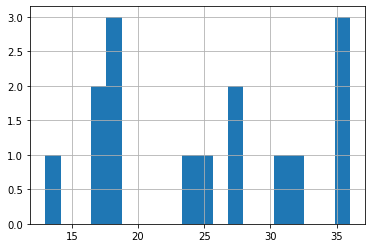

In [62]:
s8.hist(bins=20)

* Series possuem muitos métodos auxiliares para uso em colunas do tipo string

In [66]:
ss9 = pd.Series(['1 - Aceguá',
 '2 - Acrelândia',
 '3 - Alecrim',
 '4 - Almeirim',
 '5 - Alta Floresta d\'Oeste'], name='Município')

print(ss9.head())

# para acessar as funções auxiliares de strings utilize o atributo str da série
s9 = ss9.str.replace(r'([\d]* [-] )(.*)', r'\2')
s9.head()

0                   1 - Aceguá
1               2 - Acrelândia
2                  3 - Alecrim
3                 4 - Almeirim
4    5 - Alta Floresta d'Oeste
Name: Município, dtype: object


0                   Aceguá
1               Acrelândia
2                  Alecrim
3                 Almeirim
4    Alta Floresta d'Oeste
Name: Município, dtype: object

In [67]:
s9.str.startswith('Al')

0    False
1    False
2     True
3     True
4     True
Name: Município, dtype: bool

In [20]:
# para acessar as funções auxiliares de strings utilize o atributo str da série
s9[ s9.str.startswith('Al') ]

2                  Alecrim
3                 Almeirim
4    Alta Floresta d'Oeste
Name: Município, dtype: object

* podemos aplicar transformações em todas as linhas de uma série utilizando a função apply

In [69]:
ss9.head()

0                   1 - Aceguá
1               2 - Acrelândia
2                  3 - Alecrim
3                 4 - Almeirim
4    5 - Alta Floresta d'Oeste
Name: Município, dtype: object

In [70]:
ss10 = ss9.apply(lambda v: v.split('-')[1].strip())
ss10

0                   Aceguá
1               Acrelândia
2                  Alecrim
3                 Almeirim
4    Alta Floresta d'Oeste
Name: Município, dtype: object

In [74]:
'4 - Almeirim'.split('-')[1].strip()

'Almeirim'

In [75]:
def quebrar_municipio(v):
    return v.split('-')[1].strip()

ss10 = ss9.apply(quebrar_municipio)
ss10

0                   Aceguá
1               Acrelândia
2                  Alecrim
3                 Almeirim
4    Alta Floresta d'Oeste
Name: Município, dtype: object

* é possível ordenar os valores de uma série com a função sort_values()

In [81]:
ss10.str.contains('Floresta')

0    False
1    False
2    False
3    False
4     True
Name: Município, dtype: bool

In [80]:
ss10[ ss10.str.contains('Floresta') ]

4    Alta Floresta d'Oeste
Name: Município, dtype: object

In [79]:
ssss = ss9.sort_values(ascending=False)
ssss.reset_index(drop=True)

0    5 - Alta Floresta d'Oeste
1                 4 - Almeirim
2                  3 - Alecrim
3               2 - Acrelândia
4                   1 - Aceguá
Name: Município, dtype: object

* é possível realizar a contagem da ocorrência de valores

In [84]:
temperaturas = [17, 18, 24, 27, 18, 25, 27, 35, 35, 18, 17, 13, 36, 32, 31]
s8 = pd.Series(temperaturas)
s8

0     17
1     18
2     24
3     27
4     18
5     25
6     27
7     35
8     35
9     18
10    17
11    13
12    36
13    32
14    31
dtype: int64

In [94]:
# como pego o índice pelo valor?
s = s8.value_counts().reset_index()
s[s['index'] == 35].index[0]

2

Documentação do Pandas para a classe Series:
https://pandas.pydata.org/pandas-docs/stable/api.html#series

# Exercício 02

Considere as temperaturas contidas na série s_temperaturas definida abaixo:

In [96]:
np.random.seed(42)
s_temperaturas = pd.Series(np.random.randint(-5, 38, 100))
s_temperaturas.head()

0    33
1    23
2     9
3    37
4     2
dtype: int32

1. Utilize o método apply para transformar de ºC para K e atribua à variável s_temperaturas_k. Imprima as primeiras 3 linhas.<br/>
    ```Fórmula: 0 °C + 273,15 = 273,15 K```
2. Utilize o método apply para transformar de ºC para F e atribua à variável s_temperaturas_f. Imprima as últimas 5 linhas. <br/>
    ```Fórmula: (0 °C × 9/5) + 32 = 32 °F```
3. Imprima uma amostra de 10 elementos da variável s_temperaturas.
3. Faça a contagem de valores para a série.
4. Crie um índice de datas começando em 2017-05-01, de frequência diária, com 100 posições e atribua à série contida na variável s_temperaturas.
5. Busque as temperaturas compreendidas entre as datas 2017-06-01 e 2017-06-15.
6. Calcule a média de temperatura mensal (Dica: utilize o método resample da série)

In [100]:
def celcius_kelvin(c):
    k = c + 273.15
    return k

s_temperaturas_k = s_temperaturas.apply(celcius_kelvin)
s_temperaturas_k.head(3)

0    306.15
1    296.15
2    282.15
dtype: float64

In [103]:
# (0 °C × 9/5) + 32 = 32 °F
s_temperaturas_k = s_temperaturas.apply(lambda x: x * (9/5) + 32)
s_temperaturas_k.tail(5)

95    30.2
96    96.8
97    91.4
98    95.0
99    71.6
dtype: float64

In [104]:
"""
Imprima uma amostra de 10 elementos da variável s_temperaturas.
"""
s_temperaturas.sample(10)

15    -3
9      5
97    33
79    23
67     9
84     3
40    19
17    -4
48     2
37    33
dtype: int32

In [106]:
"""
Faça a contagem de valores para a série.
"""
s_temperaturas.value_counts().head()

18    6
2     5
15    4
19    4
8     4
dtype: int64

In [110]:
"""
Crie um índice de datas começando em 2017-05-01, 
de frequência diária, com 100 posições e atribua 
à série contida na variável s_temperaturas.
"""
s_temperaturas_s = s_temperaturas.copy()
s_temperaturas_s.index = pd.date_range('2017-05-01', freq='D', periods=100)
s_temperaturas_s.head()

2017-05-01    33
2017-05-02    23
2017-05-03     9
2017-05-04    37
2017-05-05     2
Freq: D, dtype: int32

In [113]:
"""
Busque as temperaturas compreendidas entre as datas 2017-06-01 e 2017-06-15.
"""
s_temperaturas_s.loc['2017-06-01':'2017-06-15']

2017-06-01     9
2017-06-02    -3
2017-06-03    31
2017-06-04     1
2017-06-05    15
2017-06-06     3
2017-06-07    33
2017-06-08    12
2017-06-09    -2
2017-06-10    19
2017-06-11     8
2017-06-12     3
2017-06-13    20
2017-06-14    -4
2017-06-15    14
Freq: D, dtype: int32

In [116]:
"""
Calcule a média de temperatura mensal 
(Dica: utilize o método resample da série)
"""

s_temperaturas_s.resample(rule='M').mean()

2017-05-31    17.516129
2017-06-30    11.966667
2017-07-31    13.387097
2017-08-31    26.250000
Freq: M, dtype: float64

In [25]:
%%javascript

(function() {var css = [
    //"body {",
    //"    font-family: serif;",
    //"}",
    ".container {",
    "    width: 100%;",
    "}",
    ".text_cell_render table {",
    "    font-size: 24;",
    "}",
    ".rendered_html code {",
    "    background-color: #fafafa; ",
    "}",
    ".rendered_html :not(pre) > code {",
    "    padding: 1px 1px;",
    "}",
    ".rendered_html pre code {",
    "    background-color: #fafafa;",
    "}",
    ".rendered_html pre {",
    "    border: 1px;",
    "    background-color: #fafafa;",
    "    padding: .5ex .5em;",
    "}"
].join("\n");
if (typeof GM_addStyle != "undefined") {
    GM_addStyle(css);
} else if (typeof PRO_addStyle != "undefined") {
    PRO_addStyle(css);
} else if (typeof addStyle != "undefined") {
    addStyle(css);
} else {
    var node = document.createElement("style");
    node.type = "text/css";
    node.appendChild(document.createTextNode(css));
    var heads = document.getElementsByTagName("head");
    if (heads.length > 0) {
        heads[0].appendChild(node);
    } else {
        // no head yet, stick it whereever
        document.documentElement.appendChild(node);
    }
}
})();

<IPython.core.display.Javascript object>

___
__Material produzido para o curso__:
* Introdução à Análise de Dados com Python

__Autor__:
* Fernando Sola Pereira

__Revisão__:
* 1.1